# Prediksi Pendapatan Pengunjung Mall

Langkah pertama adalah melakukan instalasi library pandas untuk membaca dataset pengunjung mall

In [1]:
!pip install pandas seaborn matplotlib scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


Selanjutnya adalah membaca dataset dengan library pandas

In [2]:
import pandas as pd

file_path = 'dataset/gaji.csv'
data = pd.read_csv(file_path)
data.head()

,ID,LamaPengalamanKerja-Tahun,Gaji
0,0,1.2,3275388.0
1,1,1.4,3846649.5
2,2,1.6,3141189.0
3,3,2.1,3623539.5
4,4,2.3,3321009.0


Dilihat dari gambar diatas terdapat data mengenai lama pengalaman bekerja dalam satu tahun dan gaji dalam USD

In [3]:
data.drop(['ID'],axis=1,inplace=True)
data

,LamaPengalamanKerja-Tahun,Gaji
0,1.2,3275388.00
1,1.4,3846649.50
2,1.6,3141189.00
3,2.1,3623539.50
4,2.3,3321009.00
5,3.0,4715529.75
6,3.1,5007570.75
7,3.3,4532629.50
8,3.3,5365129.50
9,3.8,4761067.50


### Melihat Deskripsi Data

Dapat dilakukan untuk melihat jumlah untuk dihitung dan rata-rata serta informasi lainnya mengenai data yang akan dianalisa seperti dibawah ini.\
Data ini nantinya akan digunakan sebagai pelatihan model machine learning yang akan dibangun.

In [4]:
data.describe()

,LamaPengalamanKerja-Tahun,Gaji
count,30.000000,3.000000e+01
mean,5.413333,6.327333e+06
std,2.837888,2.282251e+06
min,1.200000,3.141189e+06
25%,3.300000,4.722086e+06
50%,4.800000,5.431064e+06
75%,7.800000,8.370434e+06
max,10.600000,1.018913e+07


### Visualisasi Data

Dengan library `matplotlib` maka dapat dilakukan visualisasi semua data untuk melakukan apakah data ini dapat dianalisa dengan Linear Regression

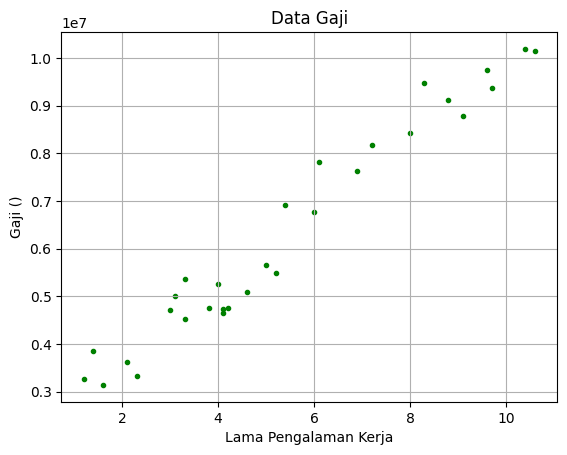

In [5]:
import matplotlib.pyplot as plt

plt.scatter(data['LamaPengalamanKerja-Tahun'],data['Gaji'],color="g",marker=".")

#add linear regression line to scatterplot 
plt.xlabel("Lama Pengalaman Kerja")
plt.ylabel("Gaji ()")
plt.title("Data Gaji")
plt.grid(True)
plt.show()

### Training Model

Setelah melihat grafik diatas maka data dapat digunakan untuk percobaan linear regression.

**1. Data tersebut diubah menjadi data training dan data testing**

In [6]:
x=data.iloc[:,:-1]   
y=data.iloc[:,1]

**2. Dengan melakukan import library `sklearn` menggunakan method `train_test_split` seperti dibawah ini dan menghitung shape**

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
    
print("Training set shape - X:", x_train.shape, " y:", y_train.shape)
print("Testing set shape - X:", x_test.shape, " y:", y_test.shape)

Training set shape - X: (18, 1)  y: (18,)
Testing set shape - X: (12, 1)  y: (12,)


**3. Setelah membagikan data maka dapat dilakukan training model tersebut dengan Linear Regression seperti dibawah ini.**

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

**4. Melihat Hasil Prediksi**

In [9]:
y_predict=model.predict(x_test)
y_predict

array([ 4721223.51502988,  6353000.25254736, 10393590.26925732,
        6197592.94421236,  5109741.78586737,  3944186.97335489,
        9228035.45674483,  4721223.51502988,  5420556.40253737,
        8373295.26090234,  8606406.22340484,  5265149.09420237])

In [10]:
x_predict=model.predict(x_train)
x_predict

array([ 7751666.02756234,  9694257.38174983,  5342852.74836987,
        5731371.01920737,  7518555.06505985,  4565816.20669488,
        6819222.17755236,  6042185.63587736, 10238182.96092232,
        9616553.72758233,  3400261.39418239,  8994924.49424233,
        3788779.66501989,  3089446.77751239,  3244854.08584739,
        4488112.55252738,  5342852.74836987,  6896925.83171985])

**5. Membuat Data Frame untuk nilai aktual dan nilai prediksi**

In [11]:
new_df=pd.DataFrame({"Actual":y_test,"Predict":y_predict})
new_df

,Actual,Predict
7,4532629.50,4.721224e+06
17,6917159.25,6.353000e+06
29,10145927.25,1.039359e+07
16,5496997.50,6.197593e+06
9,4761067.50,5.109742e+06
4,3321009.00,3.944187e+06
25,8789784.75,9.228035e+06
8,5365129.50,4.721224e+06
13,4752076.50,5.420556e+06
22,8433474.75,8.373295e+06


#### Visualisasi dataset

Dengan membuat regression line dengan cara membuat slope dan intercept dari dataset

In [12]:
slope = model.coef_[0]
intercept = model.intercept_

#### Plotting Training Dataset

Setelah membuat regression line maka dapat dilakukan visualisasi seperti dibawah ini

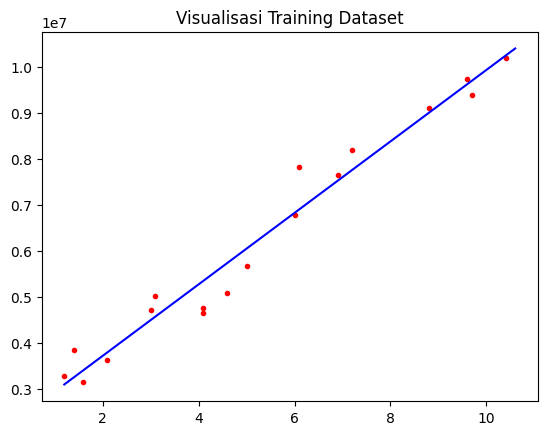

In [13]:
plt.plot(x, intercept + slope * x, color='b')
plt.scatter(x_train,y_train,color="r",marker=".")
plt.title("Visualisasi Training Dataset")
plt.show()

#### Plotting Test Dataset

Setelah membuat regression line maka dapat dilakukan visualisasi seperti dibawah ini

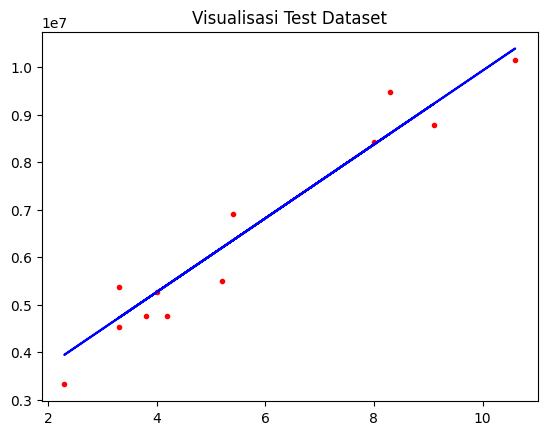

In [14]:
plt.plot(x_test, intercept + slope * x_test, color='b')
plt.scatter(x_test,y_test,color="r",marker=".")
plt.title("Visualisasi Test Dataset")
plt.show()

#### Training Score

In [15]:
training_score = model.score(x_train,y_train)*100

print(f"Hasil Model Training adalah {training_score}")

Hasil Model Training adalah 96.51415928145283


#### Testing Score

In [16]:
testing_score = model.score(x_test,y_test)*100

print(f"Hasil Model Training adalah {testing_score}")

Hasil Model Training adalah 94.14594440342293


## Akurasi Model

Setelah membuat model maka akan dilakukan pengecekan akurasi dengan menggunakan beberapa metrik sesuai dengan https://scikit-learn.org/stable/modules/model_evaluation.html|


### Mean Squared Error

di sisi lain, adalah rata-rata kotak kesalahan. Ini adalah metrik yang lebih umum daripada MAE karena menghukum kesalahan besar lebih karena operasi squaring.

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_predict)
hasil_mse=np.sqrt(mean_squared_error(y_test,y_predict))

print(f"Hasil MSE adalah {hasil_mse}")

Hasil MSE adalah 518607.6130106812


### Mean Absolute Error

MAE adalah ukuran besarnya rata-rata kesalahan dalam satu set prediksi, tanpa mempertimbangkan arah mereka. Ini adalah rata-rata atas sampel uji perbedaan absolut antara prediksi dan pengamatan aktual di mana semua perbedaan individu memiliki berat yang sama. Ini memberikan indikasi bagaimana salah prediksi.

In [18]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_predict)

print(f"Hasil MSE adalah {mae}")

Hasil MSE adalah 446197.765776831


#### R2 Score

Juga dikenal sebagai koefisien determinasi, adalah ukuran statistik yang menunjukkan proporsi varians untuk variabel dependen yang dijelaskan oleh variabel independen dalam model regresi. Secara sederhana, ini menunjukkan seberapa baik model regresi cocok dengan data.

In [19]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_predict)*100
print(f"Hasil R2 Score adalah {r2}")

Hasil R2 Score adalah 94.14594440342293
